# Pokémon API Assignment (Student Notebook)

## Goal
Use the PokéAPI to:
1. Paginate through results using `limit` and `offset`
2. Retrieve details for at least 200 Pokémon
3. Build a Pandas DataFrame and export it to `pokemon_dataset_200.csv`

## Allowed tools
Open-book and you may use AI tools responsibly. Your submission must run top-to-bottom.

## Courtesy
Add a small delay (e.g., `time.sleep(0.2)`) inside loops that make many requests.


# Task Questions

Complete each task below. Each task has a **checkpoint** you will submit (usually a number or short text).

## Required columns in your final DataFrame and CSV
- id (int)
- name (str)
- base_experience (int; fill missing with 0)
- height_dm (int)
- weight_hg (int)
- bmi_like (float)
- primary_type (str)
- secondary_type (str or None)
- ability_1 (str or None)
- ability_2 (str or None)
- hp (int)
- attack (int)
- defense (int)
- special_attack (int)
- special_defense (int)
- speed (int)
- capture_rate (int)
- is_legendary (bool)
- habitat (str or None)

## Required output file
- `pokemon_dataset_200.csv`

In [ ]:
# Question 6
# First, create a BASE constant and a get_json() helper function:
# - BASE should be the PokéAPI base URL: "https://pokeapi.co/api/v2"
# - get_json should:
#     * Accept url (str), optional params (Dict), retries (int, default 3), and backoff (float, default 0.8)
#     * Make a GET request with requests.get(url, params=params, timeout=30)
#     * Return resp.json() if status code is 200
#     * Retry with exponential backoff if status code is 429, 500, 502, 503, or 504
#        * This means that you delay the loop (sleep) progressively each iteration (backoff * iteration_number)
#     * Raise RuntimeError for other status codes or after exhausting retries
#
# Then make a single request for the first page: limit=50, offset=0
# 1) Print the status code
# 2) Confirm the JSON has a 'results' list
# Checkpoint: print the number of items in the results list

import requests
import time
from typing import Dict, Any, Optional

# Create BASE constant
BASE = "https://pokeapi.co/api/v2"

# Create get_json function
def get_json(url: str, params: Optional[Dict] = None, retries: int = 3, backoff: float = 0.8) -> Any:
    """
    Make a GET request with exponential backoff retry logic.
    
    Args:
        url: The URL to request
        params: Optional query parameters
        retries: Number of retries (default 3)
        backoff: Backoff multiplier (default 0.8)
    
    Returns:
        The JSON response if successful
    
    Raises:
        RuntimeError: If all retries are exhausted or for non-retryable status codes
    """
    retry_codes = {429, 500, 502, 503, 504}
    
    for attempt in range(retries + 1):
        try:
            resp = requests.get(url, params=params, timeout=30)
            
            if resp.status_code == 200:
                return resp.json()
            elif resp.status_code in retry_codes and attempt < retries:
                # Exponential backoff: wait progressively longer
                wait_time = backoff * (attempt + 1)
                time.sleep(wait_time)
                continue
            else:
                raise RuntimeError(f"Status code {resp.status_code} - cannot retry")
        except requests.RequestException as e:
            if attempt < retries:
                wait_time = backoff * (attempt + 1)
                time.sleep(wait_time)
                continue
            else:
                raise RuntimeError(f"Failed after {retries} retries: {e}")
    
    raise RuntimeError(f"Failed after {retries} retries")

# Make a single request for the first page: limit=50, offset=0
resp = requests.get(BASE + "/pokemon", params={"limit": 50, "offset": 0}, timeout=30)

# Print the status code
print(f"Status code: {resp.status_code}")

# Confirm the JSON has a 'results' list
data = resp.json()
if "results" in data:
    results = data["results"]
    print(f"JSON has a 'results' list: True")
    print(f"Number of items in the results list: {len(results)}")
else:
    print("ERROR: JSON does not have a 'results' list")


Status code: 200
JSON has a 'results' list: True
Number of items in the results list: 50


In [ ]:
# Question 7
# Paginate through the list endpoint until you have exactly 200 list records.
# Store combined items in a list called pokemon_list (each item should include 'name' and 'url').
# Requirements:
# - Use limit and offset (pagination)
# - Add a small delay inside your pagination loop
# Checkpoint: print len(pokemon_list)

pokemon_list = []

limit = 50
offset = 0

# Fetch the first 200 records via paginated requests
while len(pokemon_list) < 200:
    params = {"limit": limit, "offset": offset}
    page = get_json(BASE + "/pokemon", params=params)
    results = page.get("results", [])
    pokemon_list.extend(results)
    offset += limit
    time.sleep(0.2)

# Ensure we only keep the first 200 entries
pokemon_list = pokemon_list[:200]

print(len(pokemon_list))

200


In [4]:
# Question 8
# Extract integer IDs from each pokemon_list item's 'url' and store them in id_list.
# Requirement: use an explicit loop
# Checkpoint: print sum(id_list)

id_list = []

# Parse IDs from URLs into id_list
for pokemon in pokemon_list:
    url = pokemon["url"]
    # Remove trailing slash and split by /
    pokemon_id = int(url.rstrip("/").split("/")[-1])
    id_list.append(pokemon_id)

print(sum(id_list))


20100


In [5]:
# Question 9
# Create a blank Pandas DataFrame called df_pokemon with the following columns (in this exact order):
#   id, name, base_experience, height_dm, weight_hg, bmi_like,
#   primary_type, secondary_type,
#   ability_1, ability_2,
#   hp, attack, defense, special_attack, special_defense, speed,
#   capture_rate, is_legendary, habitat
#
# Notes:
#   - height_dm is height in decimeters (as returned by the API).
#   - weight_hg is weight in hectograms (as returned by the API).
#   - bmi_like = weight_hg / (height_dm ** 2). (This is NOT real BMI, but it is useful feature engineering.)
#   - Some Pokémon do not have a secondary type or a second ability. Use None for missing values.
#
# Checkpoint: Print df_pokemon.head() so you can confirm the columns were created correctly.

import pandas as pd

# Create blank DataFrame with specified columns in exact order
columns = [
    'id', 'name', 'base_experience', 'height_dm', 'weight_hg', 'bmi_like',
    'primary_type', 'secondary_type',
    'ability_1', 'ability_2',
    'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed',
    'capture_rate', 'is_legendary', 'habitat'
]

df_pokemon = pd.DataFrame(columns=columns)

print(df_pokemon.head())
print(f"Number of columns: {len(df_pokemon.columns)}")


Empty DataFrame
Columns: [id, name, base_experience, height_dm, weight_hg, bmi_like, primary_type, secondary_type, ability_1, ability_2, hp, attack, defense, special_attack, special_defense, speed, capture_rate, is_legendary, habitat]
Index: []
Number of columns: 19


In [6]:
# Question 10
# Build your dataset by looping through the 200 Pokémon you retrieved in Question 8.
# For each Pokémon:
#   1) Call the Pokémon details endpoint: https://pokeapi.co/api/v2/pokemon/{name}
#   2) Call the species endpoint: https://pokeapi.co/api/v2/pokemon-species/{name}
#   3) Extract the fields needed for the df_pokemon columns from Question 9.
#
# Extraction hints:
#   - Types live in res_json['types'] (a list). Each item has ['type']['name'] and a ['slot'] (1=primary, 2=secondary).
#   - Abilities live in res_json['abilities'] (a list). Each item has ['ability']['name'] and an ['is_hidden'] flag.
#     For this assignment, use the first two abilities in the list (regardless of hidden). If only one, set ability_2=None.
#   - Stats live in res_json['stats'] (a list). Each item has ['base_stat'] and ['stat']['name'].
#     You must map these stat names to the columns: hp, attack, defense, special_attack, special_defense, speed.
#   - From species JSON:
#       capture_rate = species_json['capture_rate']
#       is_legendary = species_json['is_legendary']
#       habitat = species_json['habitat']['name'] if habitat exists else None
#
# Implementation requirements:
#   - Add one row per Pokémon into df_pokemon.
#   - Pause briefly (time.sleep(0.2) is fine) to be polite to the API and avoid rate-limits.
#   - Your loop must be robust: if a single Pokémon fails, print the name and continue.
#
# Checkpoint: After the loop completes, print:
#   - df_pokemon.head()
#   - The average of the base_experience column

rows = []

for pokemon in pokemon_list:
    try:
        name = pokemon["name"]
        
        # Call pokemon details endpoint
        poke_url = f"{BASE}/pokemon/{name}"
        poke_json = get_json(poke_url)
        
        # Call species endpoint
        species_url = f"{BASE}/pokemon-species/{name}"
        species_json = get_json(species_url)
        
        # Extract fields
        pokemon_id = poke_json['id']
        base_experience = poke_json.get('base_experience') or 0  # Fill missing with 0
        height_dm = poke_json['height']
        weight_hg = poke_json['weight']
        bmi_like = weight_hg / (height_dm ** 2) if height_dm > 0 else 0
        
        # Types - get primary (slot 1) and secondary (slot 2)
        primary_type = None
        secondary_type = None
        for type_entry in poke_json['types']:
            if type_entry['slot'] == 1:
                primary_type = type_entry['type']['name']
            elif type_entry['slot'] == 2:
                secondary_type = type_entry['type']['name']
        
        # Abilities - first two in the list
        ability_1 = None
        ability_2 = None
        if len(poke_json['abilities']) >= 1:
            ability_1 = poke_json['abilities'][0]['ability']['name']
        if len(poke_json['abilities']) >= 2:
            ability_2 = poke_json['abilities'][1]['ability']['name']
        
        # Stats - map by name
        stats_dict = {}
        for stat_entry in poke_json['stats']:
            stat_name = stat_entry['stat']['name']
            stat_value = stat_entry['base_stat']
            stats_dict[stat_name] = stat_value
        
        hp = stats_dict.get('hp', 0)
        attack = stats_dict.get('attack', 0)
        defense = stats_dict.get('defense', 0)
        special_attack = stats_dict.get('special-attack', 0)
        special_defense = stats_dict.get('special-defense', 0)
        speed = stats_dict.get('speed', 0)
        
        # Species fields
        capture_rate = species_json['capture_rate']
        is_legendary = species_json['is_legendary']
        habitat = species_json['habitat']['name'] if species_json['habitat'] else None
        
        # Create row and append to list
        row = {
            'id': pokemon_id,
            'name': name,
            'base_experience': base_experience,
            'height_dm': height_dm,
            'weight_hg': weight_hg,
            'bmi_like': bmi_like,
            'primary_type': primary_type,
            'secondary_type': secondary_type,
            'ability_1': ability_1,
            'ability_2': ability_2,
            'hp': hp,
            'attack': attack,
            'defense': defense,
            'special_attack': special_attack,
            'special_defense': special_defense,
            'speed': speed,
            'capture_rate': capture_rate,
            'is_legendary': is_legendary,
            'habitat': habitat
        }
        
        rows.append(row)
        time.sleep(0.2)
        
    except Exception as e:
        print(f"Error processing {pokemon['name']}: {e}")
        continue

# Create DataFrame from rows
df_pokemon = pd.DataFrame(rows)

print(df_pokemon.head())
print(f"Average base_experience: {df_pokemon['base_experience'].mean()}")


   id        name  base_experience  height_dm  weight_hg  bmi_like  \
0   1   bulbasaur               64          7         69  1.408163   
1   2     ivysaur              142         10        130  1.300000   
2   3    venusaur              236         20       1000  2.500000   
3   4  charmander               62          6         85  2.361111   
4   5  charmeleon              142         11        190  1.570248   

  primary_type secondary_type ability_1    ability_2  hp  attack  defense  \
0        grass         poison  overgrow  chlorophyll  45      49       49   
1        grass         poison  overgrow  chlorophyll  60      62       63   
2        grass         poison  overgrow  chlorophyll  80      82       83   
3         fire            NaN     blaze  solar-power  39      52       43   
4         fire            NaN     blaze  solar-power  58      64       58   

   special_attack  special_defense  speed  capture_rate  is_legendary  \
0              65               65     45  

In [7]:
# Question 11
# Create three quick checks/insights from df_pokemon:
#   1) Create a new column total_base_stats that sums the 6 stat columns.
#   2) Print the top 10 Pokémon by total_base_stats (show name, primary_type, total_base_stats).
#   3) Create a summary table grouped by primary_type with:
#        - count of Pokémon (n)
#        - mean total_base_stats
#      Sort the summary by mean total_base_stats descending and print the first 10 rows.
#
# Checkpoint: Print the average total_base_stats (rounded to 2 decimals).

# 1) Create a new column total_base_stats that sums the 6 stat columns
df_pokemon['total_base_stats'] = (
    df_pokemon['hp'] + 
    df_pokemon['attack'] + 
    df_pokemon['defense'] + 
    df_pokemon['special_attack'] + 
    df_pokemon['special_defense'] + 
    df_pokemon['speed']
)

# 2) Print the top 10 Pokémon by total_base_stats
print("Top 10 Pokémon by total_base_stats:")
top_10 = df_pokemon.nlargest(10, 'total_base_stats')[['name', 'primary_type', 'total_base_stats']]
print(top_10)
print()

# 3) Create a summary table grouped by primary_type
summary = df_pokemon.groupby('primary_type').agg(
    n=('id', 'count'),
    mean_total_base_stats=('total_base_stats', 'mean')
).sort_values('mean_total_base_stats', ascending=False)

print("Summary by primary_type (top 10):")
print(summary.head(10))
print()

# Checkpoint: Print the average total_base_stats (rounded to 2 decimals)
avg_total_base_stats = round(df_pokemon['total_base_stats'].mean(), 2)
print(f"Average total_base_stats: {avg_total_base_stats}")


Top 10 Pokémon by total_base_stats:
          name primary_type  total_base_stats
149     mewtwo      psychic               680
148  dragonite       dragon               600
150        mew      psychic               600
143   articuno          ice               580
144     zapdos     electric               580
145    moltres         fire               580
58    arcanine         fire               555
129   gyarados        water               540
142    snorlax       normal               540
130     lapras        water               535

Summary by primary_type (top 10):
               n  mean_total_base_stats
primary_type                           
ice            2             517.500000
dark           2             465.000000
psychic       11             461.454545
fire          15             447.666667
dragon         3             440.000000
rock          10             419.500000
electric      13             413.076923
ghost          4             412.500000
fighting       7       

In [8]:
# Question 12
# Export to CSV as pokemon_dataset_200.csv
# Then read it back and confirm row count matches.
# Checkpoint: print the sum of the height_dm column

# Export to CSV
df_pokemon.to_csv('pokemon_dataset_200.csv', index=False)
print(f"Exported df_pokemon to pokemon_dataset_200.csv")
print(f"Original DataFrame row count: {len(df_pokemon)}")

# Read it back
df_loaded = pd.read_csv('pokemon_dataset_200.csv')
print(f"Loaded DataFrame row count: {len(df_loaded)}")

# Confirm row count matches
if len(df_pokemon) == len(df_loaded):
    print("Row counts match!")
else:
    print("ERROR: Row counts do not match!")

# Print the sum of the height_dm column
height_dm_sum = df_loaded['height_dm'].sum()
print(f"Sum of height_dm column: {height_dm_sum}")


Exported df_pokemon to pokemon_dataset_200.csv
Original DataFrame row count: 200
Loaded DataFrame row count: 200
Row counts match!
Sum of height_dm column: 2258


weight_hg = 2.19 * speed + 259.02


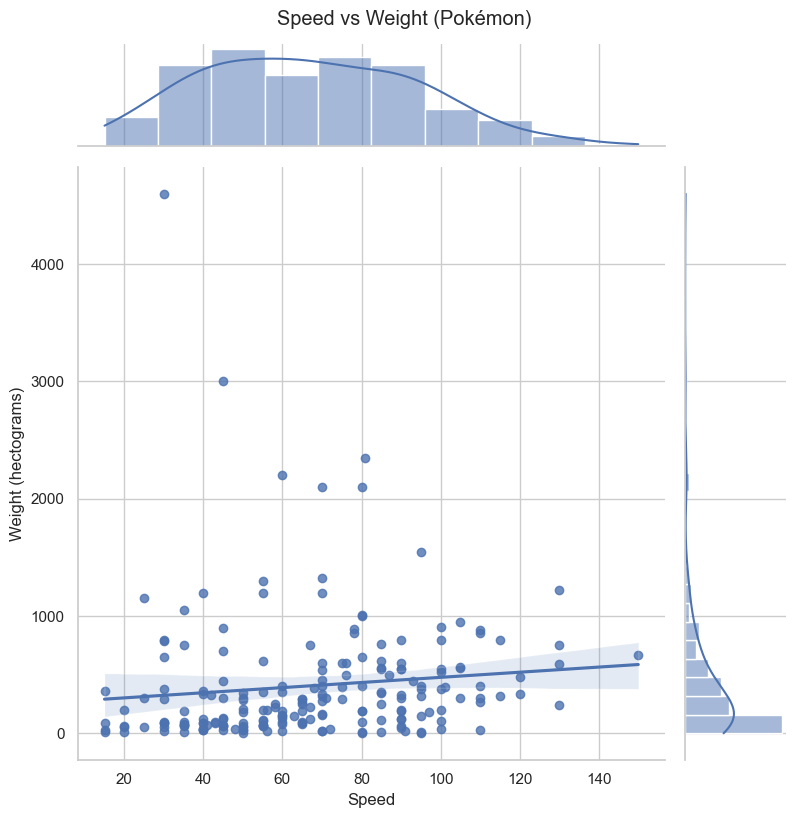

In [ ]:
# Question 13
# Create a seaborn scatterplot showing the relationship between speed (x-axis) and weight_hg (y-axis).
# Requirements:
#   1) Use seaborn's jointplot and add a regression trendline
#   2) The marginal plots should show KDE (kernel density estimate) histograms for both axes
#   3) Add appropriate axis labels and a title
#   4) Calculate and print the regression equation in the form: weight_hg = slope * speed + intercept
#
# Hints:
#   - You'll need to import seaborn and matplotlib
#   - Use scipy.stats.linregress or numpy.polyfit to calculate the regression coefficients
#   - Format the equation with 2 decimal places
#
# Checkpoint: Print the regression equation (e.g., "weight_hg = -12.34 * speed + 567.89")

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

sns.set(style="whitegrid")

# Create jointplot with regression line and KDE marginals
jp = sns.jointplot(
    data=df_pokemon,
    x="speed",
    y="weight_hg",
    kind="reg",
    height=8,
    marginal_kws={"kde": True}
)

jp.ax_joint.set_xlabel("Speed")
jp.ax_joint.set_ylabel("Weight (hectograms)")
jp.fig.suptitle("Speed vs Weight (Pokémon)", y=1.02)

# Calculate regression equation
slope, intercept, r_value, p_value, std_err = linregress(df_pokemon["speed"], df_pokemon["weight_hg"])
print(f"weight_hg = {slope:.2f} * speed + {intercept:.2f}")

plt.show()
